In [108]:
import numpy as np
from   tabulate import tabulate
from   sklearn.model_selection import train_test_split
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import mean_squared_error, mean_absolute_error
import shap

In [154]:
samples = 10000

def covariance(r, a): 
    b = np.sqrt(r**2 - a**2)
    return np.array([
            [1, b, a],
            [b, 1, 0],
            [a, 0, 1]])

radius   = 0.99999995
alpha    = 0.01 

data = np.random.multivariate_normal(mean=np.zeros(3), cov=covariance(radius, alpha), size=samples, check_valid='warn')
X = data[:,0:2]
y = data[:, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [156]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

Mean Squared Error:  0.0010410000785413245


In [157]:
 np.round(model.coef_,4)

array([ 99.9205, -99.9153])

In [158]:
explainer = shap.LinearExplainer(model=model, masker=X_train, algorithm='linear')
shap_values = explainer(X_test)

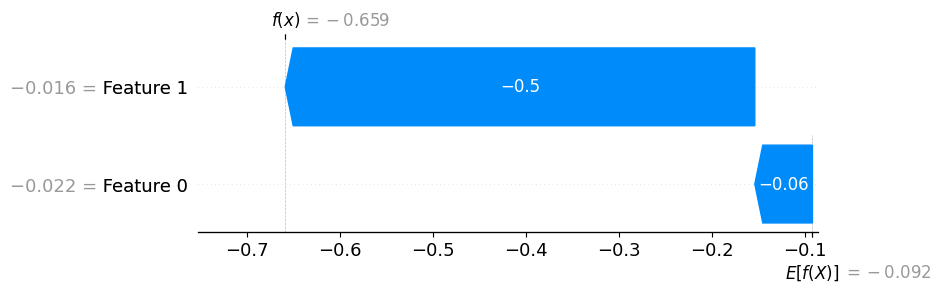

In [159]:
shap.plots.waterfall(shap_values[0])

In [160]:
y_pred[0]

-0.6588088117428637

In [161]:
y_test[0]

-0.6490879991541545